In [1]:
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data related libraries
import pandas as pd
import numpy as np
from scipy.stats import mode

# progress bar
from tqdm.notebook import tqdm

In [2]:
# load dataset
df = pd.read_csv("dataset/diabetes.csv").astype("float")

# look at first 5 data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Distance Functions

In [3]:
def euclidean(x, X):

    # Euclidean distance of 2 variables.
    #
    # Parameters:
    #   x : numpy in shape of (b,)
    #   X : numpy in shape of (a, b)
    #
    # Return:
    #   Distance of x to all elements of X using euclidean.

    return np.power(x-X, 2).sum(axis=1) ** 0.5

In [4]:
def manhattan(x, X):

    # Manhattan distance of 2 variables.
    #
    # Parameters:
    #   x : numpy in shape of (b,)
    #   X : numpy in shape of (a, b)
    #
    # Return:
    #   Distance of x to all elements of X using manhattan.

    return np.absolute(x-X).sum(axis=1)

In [5]:
def chebyshev(x, X):

    # Chebyshev distance of 2 variables.
    #
    # Parameters:
    #   x : numpy in shape of (b,)
    #   X : numpy in shape of (a, b)
    #
    # Return:
    #   Distance of x to all elements of X using chebyshev.

    return np.absolute(x-X).max(axis=1)

In [6]:
def chi_square(x, X):

    # Chi-square distance of 2 variables.
    #
    # Parameters:
    #   x : numpy in shape of (b,)
    #   X : numpy in shape of (a, b)
    #
    # Return:
    #   Distance of x to all elements of X using chi-square.

    return ( np.power(x-X, 2) / (x+X) ).sum(axis=1) * 0.5

In [7]:
def cosine_similarity(x, X):

    # Cosine similarity of 2 variables.
    #
    # Parameters:
    #   x : numpy in shape of (b,)
    #   X : numpy in shape of (a, b)
    #
    # Return:
    #   Measure of similarity of x to all elements of X using cosine.
    #   Result is reversed mean 0 is very similar and 1 is not.

    a = (x*X).sum(axis=1)
    p = (x**2).sum() ** 0.5
    q = (X**2).sum(axis=1) ** 0.5

    cos_sim = a / (p*q)

    return 1 - cos_sim # result is reversed

### Data Exploration

In [8]:
df.info() # no missing values since all "Non-Null Count" equals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [9]:
df.describe() # describe the datasets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Data Distribution

<ipython-input-10-1880eca31540>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = df.hist( ax=plt.figure( figsize=(10,10) ).gca() )


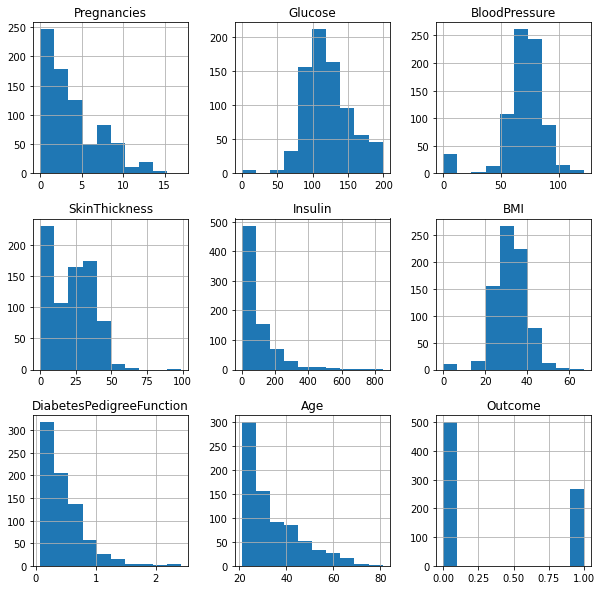

In [10]:
import matplotlib.pyplot as plt

_ = df.hist( ax=plt.figure( figsize=(10,10) ).gca() )

Notes:
- Glucose, Blood Pressure, and BMI looks like Gaussian distributed.
- Other features looks like skewed distributed.
- Many features have outlier(s).

#### Missing Value Analysis

In [11]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

- It is impossible that sugar blood level of person is 0 (unless they are dead).
- Safe to assume that this is missing value case.

In [12]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

- It is impossible for diastolic blood pressure of person is 0.
- This is going to be treated as missing value.

In [13]:
df.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

- BMI zero is impossible since BMI equal weight/height so this mean that your weight is 0 Kg.
- We are going to treat this as missing value.

In [14]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

- Seriously?
- This is going to be treated as missing value.

#### Features Correlation

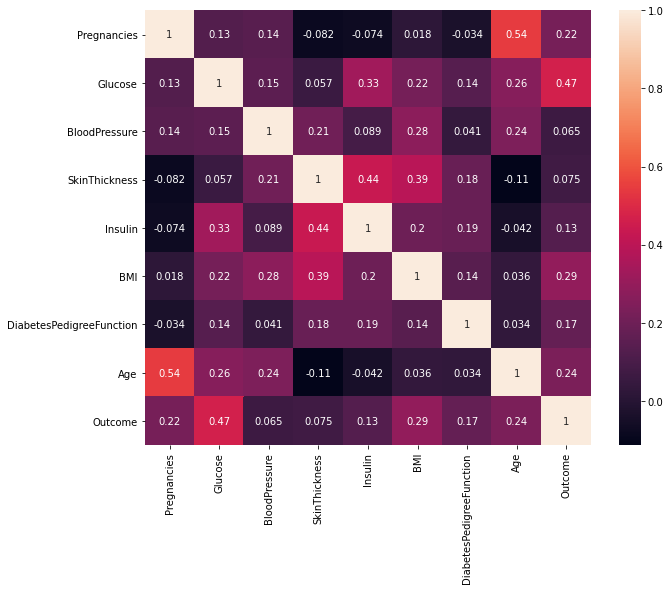

In [15]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf().set_size_inches(10, 8)
plt.show()

### Preprocessing

In [16]:
def normalization(dataset, exclude=None):

    # Normalize dataset.
    #
    # Parameters:
    #   dataset : dataframe     (dataset to normalize)
    #   exclude : string/list   (column(s) to exclude from normalizing)
    #
    # Return:
    #   Dataset that has been normalized using scaler.

    df = dataset.reset_index(drop=True)

    X = df.copy()
    if exclude != None:
        # split into x and y if there is/are
        # column(s) that want to be exclude
        X = df.drop(exclude, axis=1)
        y = df[exclude]

    # normalize data
    numer = X - X.min()
    denom = X.max() - X.min()
    X = numer / denom

    # join x and y to full dataset
    if exclude != None:
        df = X.copy()
        df[exclude] = y
        return df[dataset.columns]

    return X

In [17]:
def knn_imputer(dataset, col_to_impute, idxs_missing,
                distance_func=euclidean, k_neighbors=3):

    # Impute missing values using KNN.
    #
    # Parameters:
    #   dataset         : dataframe     (dataset that want to imputed)
    #   col_to_impute   : string        (columns to impute)
    #   idxs_missing    : list          (list of missing values indices)
    #   ditance_func    : function      (distance function)
    #   k_neighbors     : int           (number of neighbors)
    #
    # Return:
    #   Imputed dataset.

    df = dataset.reset_index(drop=True)
    df_norm = normalization(df, col_to_impute)

    # split into df_base (df for get prediction) and df_imp (df to impute)
    df_base = df_norm.drop(idxs_missing)
    df_imp  = df_norm.iloc[idxs_missing]

    # split df_base into x and y, then convert to numpy
    X_base = df_base.drop(col_to_impute, axis=1).to_numpy()
    y_base = df_base[col_to_impute].to_numpy()

    # drop col_to_impute in df_imp and convert to numpy
    X_imp = df_imp.drop(col_to_impute, axis=1).to_numpy()

    rep = df[col_to_impute].to_numpy() # array to replace col_to_impute

    for i in range( len(idxs_missing) ):

        # find indices of nearest neighbors
        nearest_neighbors = distance_func(X_imp[i], X_base).argsort()[:k_neighbors]

        # replace missing value with prediction using mean
        rep[ idxs_missing[i] ] = y_base[nearest_neighbors].mean()

    # renew dataset
    df[col_to_impute] = rep

    return df

#### Missing Values Handler

In [18]:
X = df.drop("Outcome", axis=1)
y = df.Outcome

# the order of the list is important because
# it is sorted by the length of missing data
cols = ["Glucose", "BMI", "BloodPressure", "SkinThickness"]

# find missing data in each features and replace that
for col in cols:
    idxs_missing = X[X[col] == 0].index
    X = knn_imputer(X, col, idxs_missing, k_neighbors=2)

df_mh = X.copy()
df_mh["Outcome"] = y

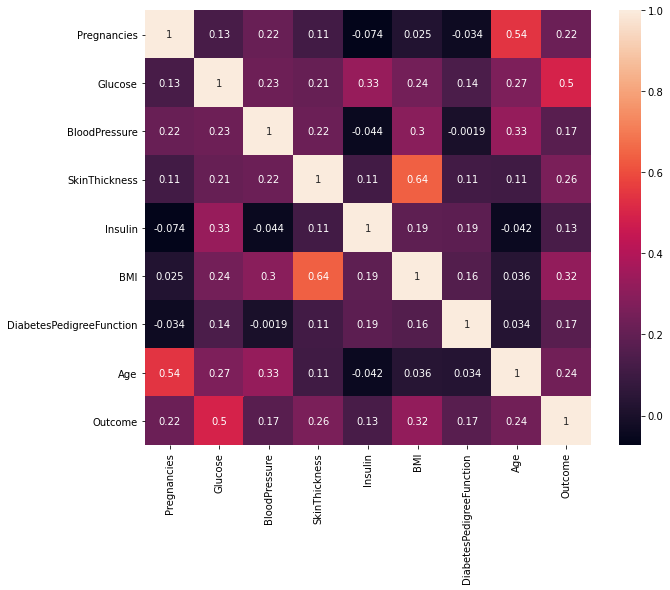

In [19]:
sns.heatmap(df_mh.corr(), annot=True)
fig = plt.gcf().set_size_inches(10, 8)
plt.show()

<ipython-input-20-90f3c879fea1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = df_mh.hist( ax=plt.figure( figsize=(10,10) ).gca() )


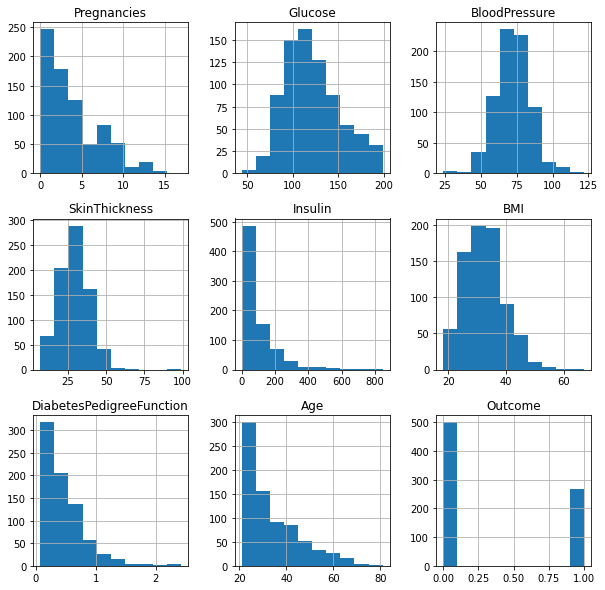

In [20]:
import matplotlib.pyplot as plt

_ = df_mh.hist( ax=plt.figure( figsize=(10,10) ).gca() )

#### Outlier Handler

In [21]:
def detect_outlier(df):

    # Detect outlier of dataset.
    #
    # Parameters:
    #   df : dataframe (dataset that want to find the outlier)
    #
    # Return:
    #   Dataframe of outlier in dataset.

    # quartile 1 and 3
    q1 = df.describe()["25%"]
    q3 = df.describe()["75%"]

    iqr = q3 - q1 # interquartile range

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    return df[(df <= lower_bound) | (df >= upper_bound)]

In [22]:
X = df_mh.drop("Outcome", axis=1)
y = df_mh.Outcome

# detect outlier each column and replace that
for col in X:
    idxs_outlier = detect_outlier(X[col]).index
    X = knn_imputer(X, col, idxs_outlier, k_neighbors=2)

df_oh = X.copy()
df_oh["Outcome"] = y

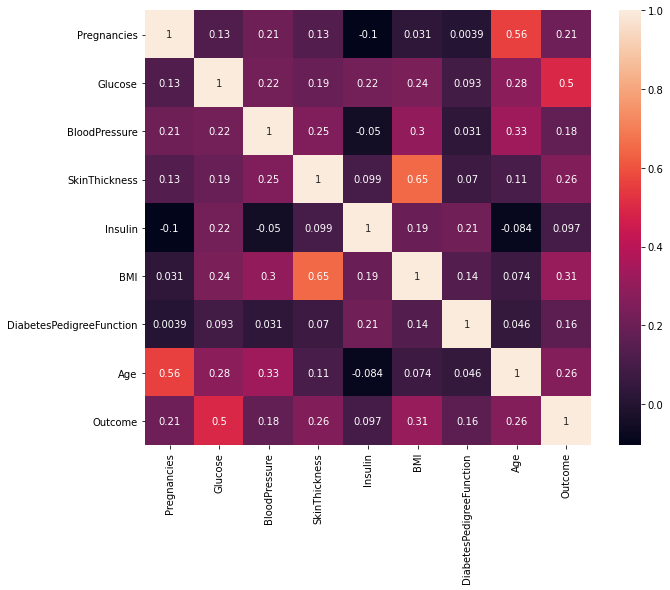

In [23]:
sns.heatmap(df_oh.corr(), annot=True)
fig = plt.gcf().set_size_inches(10, 8)
plt.show()

<ipython-input-24-3fe10e77b684>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = df_oh.hist( ax=plt.figure( figsize=(10,10) ).gca() )


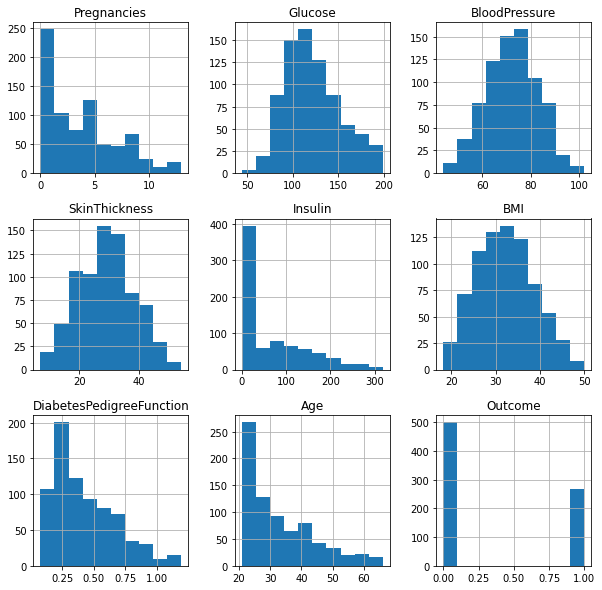

In [24]:
import matplotlib.pyplot as plt

_ = df_oh.hist( ax=plt.figure( figsize=(10,10) ).gca() )

#### Drop Unused Feature(s)

In [25]:
df_oh = df_mh.drop(["Pregnancies"], axis=1) # trial n error finding

#### Normalize Dataset

In [26]:
df_norm = normalization(df_oh, "Outcome")

df_norm.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.500739,0.493609,0.239251,0.094326,0.290263,0.168179,0.204015,0.348958
std,0.196663,0.125466,0.105727,0.136222,0.141578,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354839,0.408163,0.163043,0.000000,0.188139,0.070773,0.050000,0.000000
50%,0.470968,0.489796,0.239130,0.036052,0.287321,0.125747,0.133333,0.000000
75%,0.620968,0.571429,0.304348,0.150414,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Fold Dataset

In [27]:
# validation indices
idxs = [(614, 768), (461, 614), (307, 461), (154, 307), (0, 154)]

df_fold = [] # fold result

for idx in idxs:

    # split df_norm into data train and data validation
    df_train = df_norm.drop( range(idx[0], idx[1]) ).reset_index(drop=True)
    df_valid = df_norm[idx[0]:idx[1]].reset_index(drop=True)

    temp = {} # temporary dict

    # split data into x and y
    temp["train"] = (df_train.drop("Outcome", axis=1), df_train.Outcome)
    temp["valid"] = (df_valid.drop("Outcome", axis=1), df_valid.Outcome)

    df_fold.append(temp)

### Define KNN

In [28]:
def knn_classifier(df_train, X, distance_func=euclidean, k_neighbors=3):

    # Classifier using KNN.
    #
    # Parameters:
    #   df_train        : tuple of df   (tuple consist of x and y train)
    #   X               : dataframe     (validation data)
    #   distance_func   : function      (distance function)
    #   k_neighbors     : int           (number of neighbors)
    #
    # Return:
    #   Prediction of X using KNN with k = k_neighbors
    #   and distance function = distance_func.

    # split df train into x and y and convert to numpy
    X_train, y_train = df_train
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    
    y_pred = [] # predictions of X

    for x in X.to_numpy():

        # find indices of nearest neighbors
        nearest_neighbors = distance_func(x, X_train).argsort()[:k_neighbors]

        # get prediction of class using mode
        pred = mode(y_train[nearest_neighbors])[0][0]

        # append prediction
        y_pred.append(pred)

    return np.array(y_pred)

In [29]:
def accuracy(y_true, y_pred):

    # Accuracy of prediction.
    #
    # Parameters:
    #   y_true : numpy array in shape of (a,)
    #   y_pred : numpy array in shape of (a,)
    #
    # Return:
    #   Accuracy of y_pred againts y_true.

    return (y_true == y_pred).mean()

### Find Optimum Parameters

In [30]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [31]:
# distance function and k to be oberved
metrices = [euclidean, manhattan, chebyshev, chi_square, cosine_similarity]
k_list = range(1, 101)

df_acc = {} # list of all acc

for metric in metrices:

    k_acc = [] # list of acc in all k

    for k in tqdm(k_list):

        fold_acc = 0 # initialize total fold accuracy

        for fold in df_fold:

            # split validation fold into x and y
            X_valid, y_valid = fold["valid"]

            # get prediction of validation fold
            y_preds = knn_classifier(fold["train"], X_valid, metric, k)
            
            # calculate accuracy of prediction
            fold_acc += accuracy(y_valid, y_preds)

        fold_acc /= 5 # calculate accuracy of df_fold

        k_acc.append(fold_acc) # append acc to k_acc

    # append metric acc to df_acc
    df_acc[str(metric).split()[1]] = np.array(k_acc)*100

# print max acc and max k in each of metrices
for metric in df_acc:
    acc_max = max(df_acc[metric])
    k_max = k_list[df_acc[metric].argmax()]
    print("Metric: {}".format(metric))
    print(" K Maximum = {}".format(k_max))
    print(" Accuracy Maximum = {:.2f}%\n".format(acc_max))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Metric: euclidean
 K Maximum = 23
 Accuracy Maximum = 78.64%

Metric: manhattan
 K Maximum = 45
 Accuracy Maximum = 78.39%

Metric: chebyshev
 K Maximum = 16
 Accuracy Maximum = 78.12%

Metric: chi_square
 K Maximum = 35
 Accuracy Maximum = 75.39%

Metric: cosine_similarity
 K Maximum = 11
 Accuracy Maximum = 72.66%



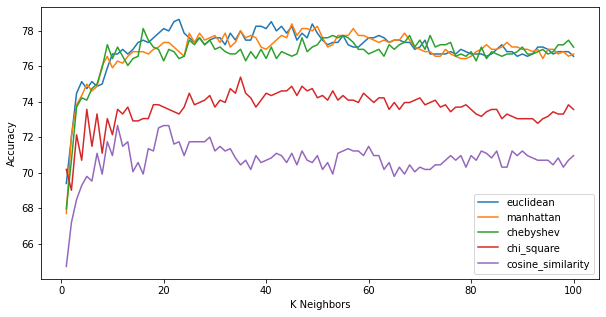

In [32]:
# plot each accuracy
plt.figure(figsize=(10, 5))
for metric in df_acc:
    plt.plot(k_list, df_acc[metric], label=metric)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()